ЗАДАНИЯ ДЛЯ ПРОЕКТА

Проверьте данные на наличие пропущенных дат. Помимо визуального способа, это можно сделать с помощью метода DataFrame.asfreq(), передав в него параметр частоты, например ‘d’ — день, ‘m’ — месяц. Все алиасы для параметров частоты доступны по ссылке.
Подсказка
df.asfreq(freq='AS')
Проверьте данные на наличие пропущенных значений (Series.isna().sum()).
Обратите внимание, что иногда пропуски в данных могут быть заполнены нулями. Сделайте проверку на наличие нулевых значений и в случае нахождения замените их на NaN. Воспользуйтесь кодом ниже:
import numpy as np
df['GDP (current US$)'] = df['GDP (current US$)'].apply(lambda x: np.nan if x==0 else x)
Для заполнения пропусков выполните интерполяцию с использованием метода .interpolate().
Подсказка
Проверьте полученный ряд на стационарность, определите параметры модели (ARIMA/ARMA) и запустите модель.
Изменился ли AIC критерий построенной модели по сравнению с моделью на неинтерполированных данных? Сделайте вывод.

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
import pmdarima as pm

In [4]:
data = pd.read_csv(
    '/Users/egor/Documents/data_science_course/SKILLFACTORY/MATH&ML-13. Временные ряды. Часть II/data/ghana_gdp.csv',
    parse_dates=["year"], 
    index_col=["year"])
data.head()

,GDP (current US$)
year,
1960-01-01,1.217087e+09
1961-01-01,0.000000e+00
1962-01-01,1.382353e+09
1963-01-01,1.540616e+09
1964-01-01,1.731092e+09


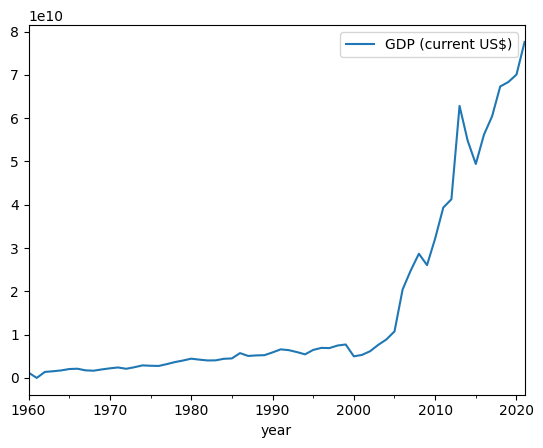

In [5]:
data.plot()
plt.show()

In [6]:
data_m = data.asfreq(freq='M')

In [7]:
data.isna().sum()

GDP (current US$)    0
dtype: int64

In [8]:
import numpy as np
data['GDP (current US$)'] = data['GDP (current US$)'].apply(lambda x: np.nan if x==0 else x)

In [9]:
data = data['GDP (current US$)'].interpolate(method='linear')

In [10]:
sm.tsa.adfuller(data)

(2.3808487575556314,
 0.99900101016983,
 0,
 61,
 {'1%': -3.542412746661615,
  '5%': -2.910236235808284,
  '10%': -2.5927445767266866},
 2357.104266762714)

In [11]:
data_1diff = data.diff().dropna()
sm.tsa.adfuller(data_1diff)

(-1.7397184892921516,
 0.41077316906677513,
 11,
 49,
 {'1%': -3.5714715250448363,
  '5%': -2.922629480573571,
  '10%': -2.5993358475635153},
 2306.348682901447)

In [12]:
data_2diff = data_1diff.diff().dropna()
sm.tsa.adfuller(data_2diff)

(-1.7042548913504096,
 0.42892157301176737,
 10,
 49,
 {'1%': -3.5714715250448363,
  '5%': -2.922629480573571,
  '10%': -2.5993358475635153},
 2262.6739516935577)

In [13]:
data_3diff = data_2diff.diff().dropna()
sm.tsa.adfuller(data_3diff)

(-5.456208629828492,
 2.5783244972037654e-06,
 9,
 49,
 {'1%': -3.5714715250448363,
  '5%': -2.922629480573571,
  '10%': -2.5993358475635153},
 2218.533874085689)

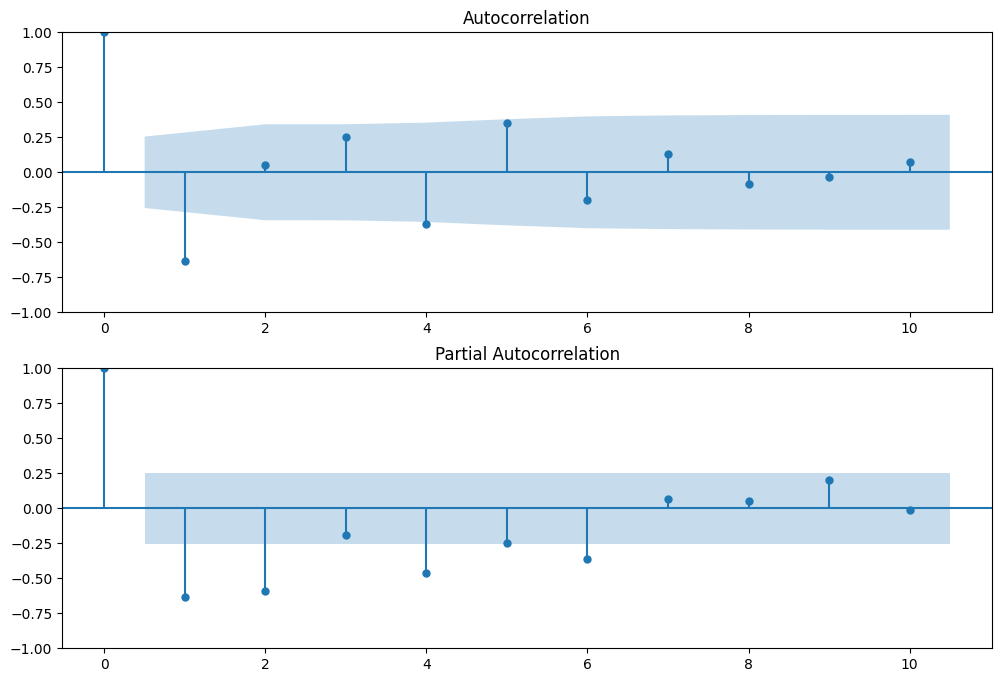

In [14]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data_3diff.values.squeeze(), lags=10, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_3diff, lags=10, ax=ax2)

In [15]:
test_df = data.iloc[-3:]
train_df = data.iloc[:-3]
test_df

year
2019-01-01    6.833754e+10
2020-01-01    7.004320e+10
2021-01-01    7.759428e+10
Name: GDP (current US$), dtype: float64

In [16]:
smodel = pm.auto_arima(
    train_df,
    start_p=1,
    d=3,
    start_q=1,
    max_p=3,
    max_q=15,
    D=3,
    start_P=0,
    test="adf",
    error_action="ignore",
    trace=True,
)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,3,1)(0,0,0)[0]             : AIC=2670.933, Time=0.02 sec
 ARIMA(0,3,0)(0,0,0)[0]             : AIC=2734.778, Time=0.00 sec
 ARIMA(1,3,0)(0,0,0)[0]             : AIC=2707.155, Time=0.00 sec
 ARIMA(0,3,1)(0,0,0)[0]             : AIC=2682.372, Time=0.01 sec
 ARIMA(2,3,1)(0,0,0)[0]             : AIC=2659.226, Time=0.10 sec
 ARIMA(2,3,0)(0,0,0)[0]             : AIC=2678.992, Time=0.01 sec
 ARIMA(3,3,1)(0,0,0)[0]             : AIC=2660.791, Time=0.01 sec
 ARIMA(2,3,2)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(1,3,2)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(3,3,0)(0,0,0)[0]             : AIC=2676.882, Time=0.01 sec
 ARIMA(3,3,2)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(2,3,1)(0,0,0)[0] intercept   : AIC=2665.990, Time=0.01 sec

Best model:  ARIMA(2,3,1)(0,0,0)[0]          
Total fit time: 0.333 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   59
Model:               SARIMAX(2, 3, 1)   Log Likelihood               -1325.613
Date:                Fri, 21 Jul 2023   AIC                           2659.226
Time:                        20:10:47   BIC                           2667.328
Sample:                    01-01-1960   HQIC                          2662.367
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7420      0.129     -5.756      0.000      -0.995      -0.489
ar.L2         -0.4585      0.223     -2.056      0.040      -0.895      -0.022
ma.L1         -0.9729      0.110     -8.806      0.000      -1.189      -0.756
sigma2      3.139e+19   4.77e-22   6.58e+40      0.000    3.14e+19    3.14e+19
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):               163.47
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):             440.85   Skew:                            -0.73
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.22e+57. Standard errors may be unstable.
"""

In [17]:
data

year
1960-01-01    1.217087e+09
1961-01-01    1.299720e+09
1962-01-01    1.382353e+09
1963-01-01    1.540616e+09
1964-01-01    1.731092e+09
                  ...     
2017-01-01    6.040638e+10
2018-01-01    6.729928e+10
2019-01-01    6.833754e+10
2020-01-01    7.004320e+10
2021-01-01    7.759428e+10
Name: GDP (current US$), Length: 62, dtype: float64

In [18]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=3, test_size=7)

train_test_groups = tscv.split(data) 
for train_index, test_index in train_test_groups:
    print("TRAIN size:", len(train_index), "TEST size:", len(test_index))

TRAIN size: 41 TEST size: 7
TRAIN size: 48 TEST size: 7
TRAIN size: 55 TEST size: 7


In [19]:
data['vol'] = data.pct_change(1).mul(100).abs()
data['vol'].head()

year
1960-01-01          NaN
1961-01-01     6.789413
1962-01-01     6.357759
1963-01-01    11.448835
1964-01-01    12.363636
Name: GDP (current US$), dtype: float64

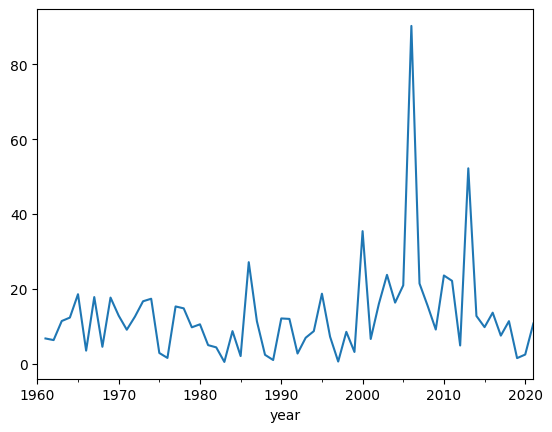

In [20]:
data.vol.plot()
plt.show()

In [22]:
train_df = data.loc[:"2018-01-01"]
test_df = data.loc["2019-01-01":]

KeyError: '2018-01-01'

In [ ]:
data.vol

year
1960-01-01          NaN
1961-01-01     6.789413
1962-01-01     6.357759
1963-01-01    11.448835
1964-01-01    12.363636
                ...    
2017-01-01     7.551317
2018-01-01    11.410877
2019-01-01     1.542746
2020-01-01     2.495937
2021-01-01    10.780603
Name: GDP (current US$), Length: 62, dtype: float64

In [ ]:
plt.rcParams["figure.figsize"] = 10, 5

sgt.plot_pacf(train_df.vol[1:], lags=50, method="ywm")
plt.show()

NameError: name 'sgt' is not defined